# Read Cadence of LSST
======================================

- author : Sylvie Dagoret-Campagne
- date : March 13th 2018

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
import sqlite3

In [37]:
conn = sqlite3.connect('./minion_1016_sqlite.db')

In [38]:
cursor=conn.cursor()

In [39]:
cursor=conn.execute("SELECT obsHistID, night,expDate,expMJD,filter,airmass,Field_fieldID from ObsHistory")

In [40]:
all_nights = []
all_expDate = []
all_expMJD = []
all_airmass = []
all_filter = []
all_field = []

for row in cursor:
    obshistid = row[0]
    night=row[1]
    all_nights.append(night)
    expdate=row[2]
    all_expDate.append(expdate)
    expmgd=row[3]
    all_expMJD.append(expmgd)
    thefilter=row[4]
    all_filter.append(thefilter)
    airmass=row[5]
    all_airmass.append(airmass)
    field=row[6]
    all_field.append(field)
    

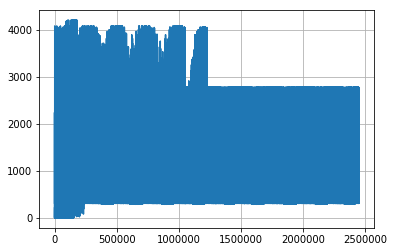

In [59]:
plt.plot(all_field)
plt.grid()

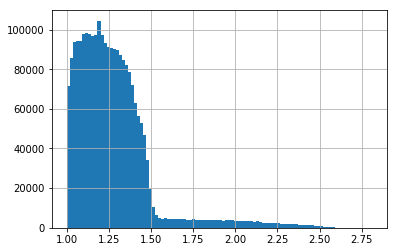

In [60]:
plt.hist(all_airmass,bins=100);
plt.grid()

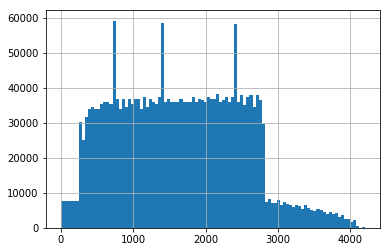

In [58]:
plt.hist(all_field,bins=100);
plt.grid()

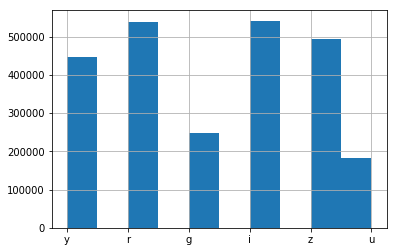

In [57]:
plt.hist(all_filter);
plt.grid()